<a href="https://colab.research.google.com/github/bdowns20/pydata-book/blob/1st-edition/Copy_of_Tensorflow_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import model_card_toolkit


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
tf.__version__

'2.4.0'

In [ ]:
print("Num GPUs Available: ", tf.config.experimental.list_physical_devices())
#tf.debugging.set_log_device_placement(False)

Num GPUs Available:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
mnist_data, mnist_info = tfds.load("mnist", as_supervised=True, with_info=True)
mnist_train, mnist_test = mnist_data["train"], mnist_data["test"]

assert isinstance(mnist_train, tf.data.Dataset)

def normalize_data(features, labels):
  return tf.cast(features, tf.float32) / 256., labels

mnist_train = mnist_train.map(normalize_data).batch(128)
mnist_test = mnist_test.map(normalize_data).batch(128)

In [ ]:
iter = tfds.as_numpy(mnist_train)
for val in iter:
  break
val

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

4
(128, 28, 28, 1)


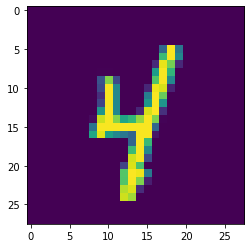

[0.         0.         0.         0.         0.         0.
 0.         0.         0.02734375 0.91796875 0.98828125 0.8125
 0.58984375 0.66015625 0.83984375 0.98828125 0.8046875  0.0078125
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [ ]:
print(val[1][0])
print(val[0].shape)
plt.imshow(val[0][0, :, :, 0])
plt.show()
print(val[0][0, 14, : , 0])

In [ ]:
def comp_and_train(model):
    model.compile(
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      optimizer=tf.keras.optimizers.Adam(0.001),
      metrics=['accuracy'],
    )

    hist = model.fit(
      mnist_train,
      epochs=6,
      validation_data=mnist_test,
    )
    print(model.summary())

In [ ]:
comp_and_train(models.Sequential([ 
  layers.Flatten(input_shape=(28, 28, 1)),
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
]))

Epoch 1/6
469/469 [==============================] - 8s 15ms/step - loss: 0.4678 - accuracy: 0.8686 - val_loss: 0.1333 - val_accuracy: 0.9619
Epoch 2/6
469/469 [==============================] - 2s 5ms/step - loss: 0.1221 - accuracy: 0.9661 - val_loss: 0.0963 - val_accuracy: 0.9707
Epoch 3/6
469/469 [==============================] - 3s 5ms/step - loss: 0.0775 - accuracy: 0.9776 - val_loss: 0.0860 - val_accuracy: 0.9745
Epoch 4/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0543 - accuracy: 0.9851 - val_loss: 0.0785 - val_accuracy: 0.9756
Epoch 5/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0387 - accuracy: 0.9898 - val_loss: 0.0722 - val_accuracy: 0.9792
Epoch 6/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0275 - accuracy: 0.9930 - val_loss: 0.0708 - val_accuracy: 0.9800
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
f

In [ ]:
comp_and_train(models.Sequential([ 
  layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(128, activation="relu"),
  layers.Dense(10, activation="softmax")
]))

Epoch 1/6
469/469 [==============================] - 4s 5ms/step - loss: 0.4424 - accuracy: 0.8775 - val_loss: 0.0831 - val_accuracy: 0.9730
Epoch 2/6
469/469 [==============================] - 2s 5ms/step - loss: 0.0722 - accuracy: 0.9796 - val_loss: 0.0611 - val_accuracy: 0.9794
Epoch 3/6
469/469 [==============================] - 2s 5ms/step - loss: 0.0494 - accuracy: 0.9855 - val_loss: 0.0559 - val_accuracy: 0.9807
Epoch 4/6
469/469 [==============================] - 2s 5ms/step - loss: 0.0364 - accuracy: 0.9895 - val_loss: 0.0523 - val_accuracy: 0.9822
Epoch 5/6
469/469 [==============================] - 2s 5ms/step - loss: 0.0270 - accuracy: 0.9929 - val_loss: 0.0527 - val_accuracy: 0.9831
Epoch 6/6
469/469 [==============================] - 3s 5ms/step - loss: 0.0200 - accuracy: 0.9944 - val_loss: 0.0517 - val_accuracy: 0.9837
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
